In [ ]:
#1. What are the traits of constituents that give gifts/donations?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [2]:
# Load dataset
data = pd.read_csv('./Resources/constituents.csv')
data

,ConstituentID,City,State,Postcode,Country,Constituent type,Constituent codes,Lifetime giving,First gift amount,First gift type,...,Education,Gender,Marital status,Solicit codes,Student Organizations,Arts,Fraternal Organizations,Men's Athletics,Scholarship Recipient,Women's Athletics
0,60472,Superior,WI,54880-2556,United States,Organization,Business (No start date - No end date),0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43735,Hermantown,MN,55811-1755,United States,Organization,Other Organizations (8/29/2012 - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60145,Esko,MN,55733-9645,United States,Organization,Other Organizations (No start date - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21332,NaN,NaN,NaN,United States,Organization,Business (No start date - No end date),25,25,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50410,Superior,WI,54880-1504,United States,Organization,Business (No start date - No end date),0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,46217,Duluth,MN,55808-1945,United States,Individual,Attended Didn't Graduate (No start date - No e...,75,75,One-time gift,...,"UW-Superior,Not primary,Business Administratio...",Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Track & Field (No date)
50909,46390,Duluth,MN,55808-1725,United States,Individual,Former Parent (No start date - No end date),0,NaN,NaN,...,NaN,Male,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50910,50122,Duluth,MN,55808-1737,United States,Individual,Alumni (No start date - No end date),0,NaN,NaN,...,"UW-Superior,Primary,Physical Education,BS,2014",Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50911,59551,Centuria,WI,54824-7721,United States,Individual,Parent (No start date - No end date),0,NaN,NaN,...,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data preprocessing
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Marital status'] = LabelEncoder().fit_transform(data['Marital status'])
data['Education'] = LabelEncoder().fit_transform(data['Education'])


In [4]:
# Convert custom fields to numeric, handling missing values and non-numeric entries
custom_fields = ['Student Organizations', 'Arts', 'Fraternal Organizations', 
                 'Men\'s Athletics', 'Women\'s Athletics', 'Scholarship Recipient']

for field in custom_fields:
    data[field] = pd.to_numeric(data[field], errors='coerce').fillna(0)

In [5]:
# Convert Lifetime giving to numeric, handling any issues
data['Lifetime giving'] = pd.to_numeric(data['Lifetime giving'], errors='coerce').fillna(0)


In [6]:
# Feature engineering
data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(data['Latest gift date'])).dt.days
data['Frequency'] = data.groupby('ConstituentID')['Latest gift date'].transform('count')
data['MonetaryValue'] = data['Lifetime giving']
data['EngagementScore'] = data[custom_fields].sum(axis=1)

In [7]:
# Create a Donor column (1 if the constituent is a donor, 0 otherwise)
data['Donor'] = (data['Lifetime giving'] > 0).astype(int)

In [8]:
# Convert 'Constituent type' to one-hot encoded columns
data = pd.get_dummies(data, columns=['Constituent type'], drop_first=True)

In [9]:
# Exploratory Data Analysis (EDA)

In [10]:
# 1. Traits of constituents that give gifts/donations

In [11]:
donors = data[data['Donor'] == 1]

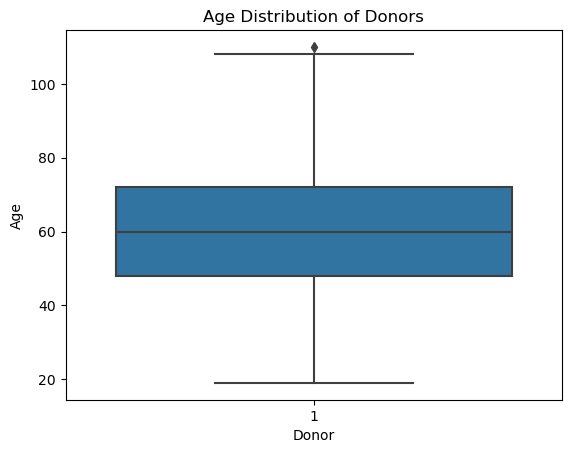

In [12]:
sns.boxplot(x='Donor', y='Age', data=donors)
plt.title("Age Distribution of Donors")
plt.show()

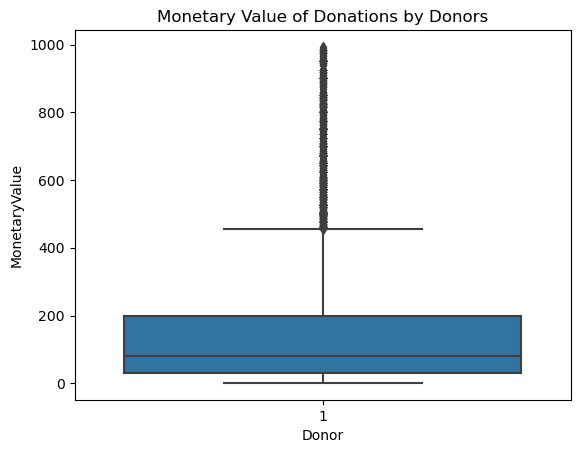

In [13]:
sns.boxplot(x='Donor', y='MonetaryValue', data=donors)
plt.title("Monetary Value of Donations by Donors")
plt.show()

In [14]:
# 2. Traits of constituents that do not give gifts/donations

In [15]:
non_donors = data[data['Donor'] == 0]

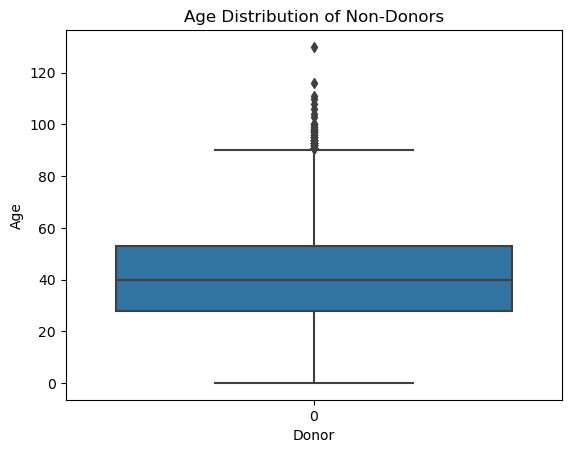

In [16]:
sns.boxplot(x='Donor', y='Age', data=non_donors)
plt.title("Age Distribution of Non-Donors")
plt.show()

In [17]:
# Model Building to Distinguish Donors from Non-Donors

In [18]:
# Define features and target
# Define features and target
features = ['Age', 'Gender', 'Marital status', 'Education', 'Recency', 'Frequency', 
            'MonetaryValue', 'EngagementScore'] + [col for col in data.columns if col.startswith('Constituent type_')]
X = data[features]
y = data['Donor']  # Using the Donor column as the target

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Feature Importance
importance = pd.Series(model.coef_[0], index=features)
importance.plot(kind='barh')
plt.title("Feature Importance in Predicting Donors vs. Non-Donors")
plt.show()

In [ ]:
# 3. Suggested steps to make a non-donor a donor


In [ ]:
# Segment non-donors
non_donors['Segment'] = KMeans(n_clusters=3, random_state=42).fit_predict(non_donors[features])


In [ ]:
# Analyze segments
sns.countplot(x='Segment', data=non_donors)
plt.title("Non-Donor Segmentation")
plt.show()

In [ ]:
# Create engagement strategies for each segment
strategies = {
    0: 'Social Media Campaign',
    1: 'Personalized Email Outreach',
    2: 'Invitation to Events'
}

non_donors['EngagementStrategy'] = non_donors['Segment'].map(strategies)

In [ ]:
# Display suggested strategies
print(non_donors[['Segment', 'EngagementStrategy']])